In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [2]:
#load assesment file
TTEC = "Resources/HistoricalData_TTEC.csv"
TTEC_df = pd.read_csv(TTEC)
TTEC_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/30/2021,$104.5,75136,$103.24,$104.69,$102.41
1,07/29/2021,$103.68,92759,$102.01,$104.2399,$100.655
2,07/28/2021,$101.56,43367,$101.21,$102.43,$99.85
3,07/27/2021,$100.55,59346,$102.23,$102.25,$99.39
4,07/26/2021,$102.7,47389,$102.1,$103.17,$102.1


CLEAN, RESHAPE AND CONVERT DATATYPE

In [3]:
TTEC_df['Date']= pd.to_datetime(TTEC_df['Date'])
TTEC_df['Close/Last'] = TTEC_df['Close/Last'].str.replace('$','')
TTEC_df['Open'] = TTEC_df['Open'].str.replace('$','')
TTEC_df['High'] = TTEC_df['High'].str.replace('$','')
TTEC_df['Low'] = TTEC_df['Low'].str.replace('$','')
TTEC_df = TTEC_df.apply( pd.to_numeric)

<ipython-input-3-b60ab4c99ead>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  TTEC_df['Close/Last'] = TTEC_df['Close/Last'].str.replace('$','')
<ipython-input-3-b60ab4c99ead>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  TTEC_df['Open'] = TTEC_df['Open'].str.replace('$','')
<ipython-input-3-b60ab4c99ead>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  TTEC_df['High'] = TTEC_df['High'].str.replace('$','')
<ipython-input-3-b60ab4c99ead>:5: FutureWarning: The default value of regex will change from True to False in a fut

FORMAT DATE COLUMN

In [4]:
TTEC_df['Date']= pd.to_datetime(TTEC_df['Date'])
TTEC_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-07-30,104.50,75136,103.24,104.6900,102.410
1,2021-07-29,103.68,92759,102.01,104.2399,100.655
2,2021-07-28,101.56,43367,101.21,102.4300,99.850
3,2021-07-27,100.55,59346,102.23,102.2500,99.390
4,2021-07-26,102.70,47389,102.10,103.1700,102.100


In [5]:
TTEC_df['Open_Close'] = (TTEC_df['Open'] - TTEC_df['Close/Last'])/TTEC_df['Open']
TTEC_df['High_Low'] = (TTEC_df['High'] - TTEC_df['Low'])/TTEC_df['Low']
TTEC_df['Increase_Decrease'] = np.where(TTEC_df['Volume'].shift(-1) > TTEC_df['Volume'],1,0)
TTEC_df['Buy_Sell_on_Open'] = np.where(TTEC_df['Open'].shift(-1) > TTEC_df['Open'],1,0)
TTEC_df['Buy_Sell'] = np.where(TTEC_df['Close/Last'].shift(-1) > TTEC_df['Close/Last'],1,0)
TTEC_df['Returns'] = TTEC_df['Close/Last'].pct_change()
TTEC_df = TTEC_df.dropna()
TTEC_df.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-07-29,103.68,92759,102.01,104.2399,100.655,-0.016371,0.035616,0,0,0,-0.007847
2,2021-07-28,101.56,43367,101.21,102.4300,99.850,-0.003458,0.025839,1,1,0,-0.020448
3,2021-07-27,100.55,59346,102.23,102.2500,99.390,0.016434,0.028776,0,0,1,-0.009945
4,2021-07-26,102.70,47389,102.10,103.1700,102.100,-0.005877,0.010480,1,0,0,0.021382
5,2021-07-23,101.65,66841,101.74,101.9700,100.550,0.000885,0.014122,1,1,0,-0.010224


SPLIT DATAFRAME

In [6]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = TTEC_df["Date"] >= start_date
before_end_date = TTEC_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
TTEC_df_4 = TTEC_df.loc[between_two_dates]
TTEC_df_4.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
299,2020-05-22,39.57,77378,38.88,39.580,38.590,-0.017747,0.025654,1,1,0,-0.017383
300,2020-05-21,38.55,85690,40.00,40.000,38.430,0.036250,0.040853,1,0,1,-0.025777
301,2020-05-20,39.46,308242,38.44,39.565,38.235,-0.026535,0.034785,0,1,0,0.023606
302,2020-05-19,37.69,194724,39.08,39.490,37.650,0.035568,0.048871,0,0,1,-0.044856
303,2020-05-18,39.19,90589,38.38,39.460,38.380,-0.021105,0.028140,0,0,0,0.039798


SPLIT DATAFRAME

In [7]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = TTEC_df["Date"] >= start_date
before_end_date = TTEC_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
TTEC_df_ls = TTEC_df.loc[between_two_dates]
TTEC_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
47,2021-05-24,102.51,76656,102.34,102.73,101.0901,-0.001661,0.016222,1,1,0,0.009851
48,2021-05-21,101.20,84312,103.73,105.27,101.2000,0.024390,0.040217,0,0,1,-0.012779
49,2021-05-20,102.42,74156,100.18,102.42,99.7300,-0.022360,0.026973,1,0,0,0.012055
50,2021-05-19,99.69,97330,98.31,99.90,95.1500,-0.014037,0.049921,1,1,1,-0.026655
51,2021-05-18,100.31,112831,103.15,103.15,100.1000,0.027533,0.030470,0,1,1,0.006219


PLOT FIRST DF (4YEARS)

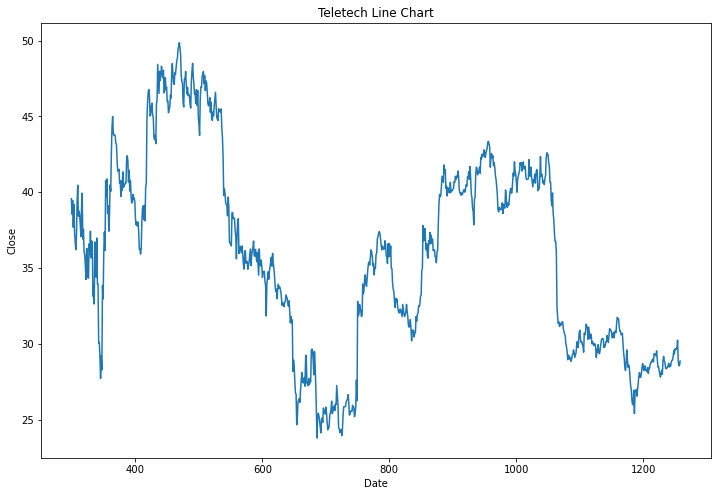

In [8]:
plt.figure(figsize=(12,8))
plt.plot(TTEC_df_4['Close/Last'])
plt.title("Teletech Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

PLOT SECOND DF (LAST YEAR)

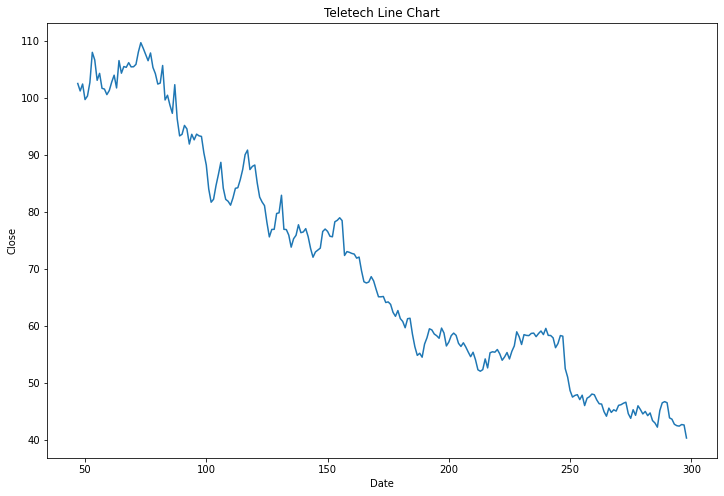

In [9]:
plt.figure(figsize=(12,8))
plt.plot(TTEC_df_ls['Close/Last'])
plt.title("Teletech Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [10]:
TTEC_df_4.shape

(960, 12)

In [12]:
X = np.array(TTEC_df_4['Open']).reshape(960,-1)
Y = np.array(TTEC_df_4['Close/Last']).reshape(960,-1)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X, Y)

LinearRegression()

In [16]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.38719738]
coefficient count: 1


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.9876338084291528


In [18]:
# Predicting the price
lr.predict(X)

array([[38.85221927],
       [39.96026517],
       [38.41691552],
       [39.05008461],
       [38.35755592],
       [36.42836887],
       [36.06231799],
       [36.68559381],
       [39.57442776],
       [39.87122576],
       [39.38645568],
       [39.20837688],
       [38.7236068 ],
       [39.84154596],
       [40.59343425],
       [38.07065118],
       [40.10866417],
       [38.09043771],
       [38.21905018],
       [36.52730154],
       [35.69626711],
       [35.09277783],
       [34.56843468],
       [35.35989604],
       [35.72594691],
       [35.52808158],
       [34.63768755],
       [35.35989604],
       [37.03185815],
       [36.92303221],
       [36.59655441],
       [37.45726863],
       [37.80353297],
       [34.76630002],
       [33.95505213],
       [32.28309002],
       [35.68637385],
       [36.69548708],
       [34.84544616],
       [35.3401095 ],
       [34.35078281],
       [33.98473193],
       [31.84778627],
       [30.59134137],
       [29.62180121],
       [27

In [19]:
#daily Return
DA_RE = TTEC_df_4['Close/Last'].pct_change(1)
DA_RE.head()

299         NaN
300   -0.025777
301    0.023606
302   -0.044856
303    0.039798
Name: Close/Last, dtype: float64

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

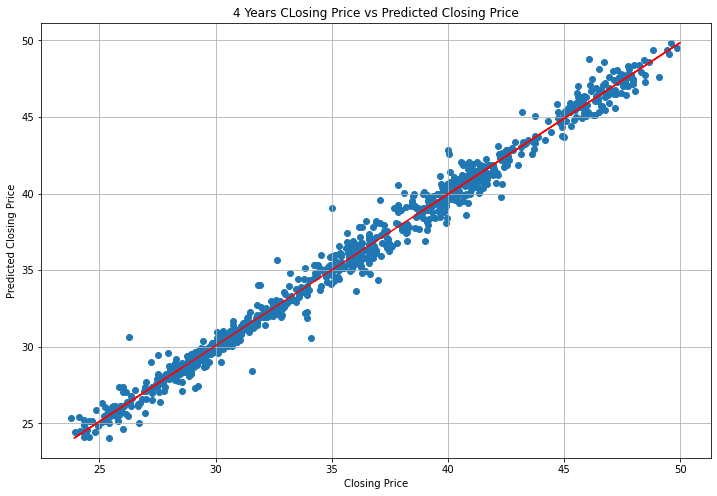

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(TTEC_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/TTEC_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

TRAINING, TESTING ML ON 2ND DF

In [23]:
TTEC_df_ls.shape

(252, 12)

In [25]:
X_ls = np.array(TTEC_df_ls['Open']).reshape(252,-1)
Y_ls = np.array(TTEC_df_ls['Close/Last']).reshape(252,-1)

In [26]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [27]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.42234996]
coefficient count: 1


In [28]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9936544149937238


In [29]:
# Predicting the price
lr.predict(X_ls)

array([[102.24240986],
       [103.62534794],
       [100.09338377],
       [ 98.23288434],
       [103.04829464],
       [106.75934431],
       [107.71446701],
       [103.95367137],
       [103.72483989],
       [ 99.4566353 ],
       [101.26738876],
       [101.50616944],
       [101.82454367],
       [103.65519552],
       [102.84931074],
       [102.9289043 ],
       [104.81925132],
       [105.56544093],
       [105.08787958],
       [105.2371175 ],
       [106.64990317],
       [105.96340872],
       [105.88381516],
       [105.89376436],
       [107.63487345],
       [109.58491564],
       [108.93821798],
       [108.77903086],
       [106.63995397],
       [108.37111387],
       [105.76442483],
       [104.62026742],
       [103.55570357],
       [102.23246066],
       [104.99833682],
       [ 99.72526356],
       [100.34211364],
       [ 99.39694013],
       [ 97.07877774],
       [102.65032684],
       [ 96.41218168],
       [ 92.82052235],
       [ 94.59147903],
       [ 94

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

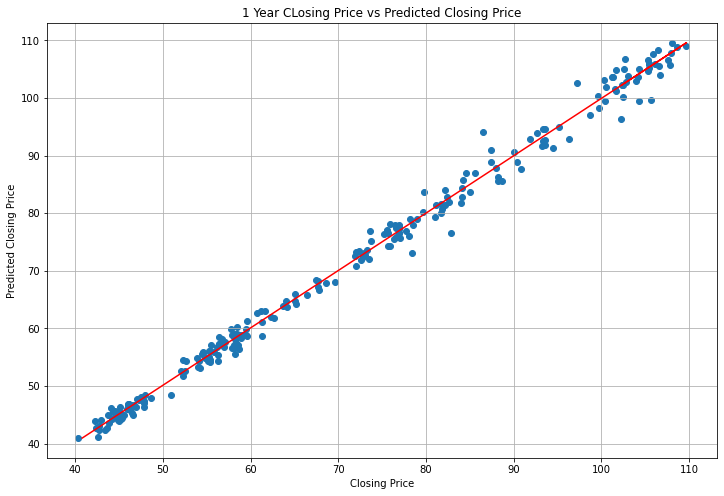

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(TTEC_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/TTEC_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')

In [31]:
TTEC_df.shape

(1258, 12)

In [32]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [33]:
Xc = np.array(TTEC_df['Returns'], dtype = float) # Feature
Yc = np.array(TTEC_df['Close/Last'], dtype = float) # Target

In [34]:
model.fit(Xc, Yc, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 1476.3267
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 641.2429
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 470.9467
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 436.5200
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 429.9291
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 429.0080
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 428.7954
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 428.8199
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 428.8326
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 428.8430
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 428.8648
Epoch 12/100
40/40 [==============================] - 0s 1ms/step - loss: 428.7546
Epoch 13/100

40/40 [==============================] - 0s 2ms/step - loss: 428.8258
Epoch 100/100
40/40 [==============================] - 0s 2ms/step - loss: 428.8151


In [35]:
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(np.array(TTEC_df['Returns']).reshape(1257,-1))
X = np.array(normalized_X, dtype = float)
normalized_Y = scaler.fit_transform(np.array(TTEC_df['Close/Last']).reshape(1257,-1))
Y = np.array(normalized_Y, dtype = float)

ValueError: cannot reshape array of size 1258 into shape (1257,newaxis)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [ ]:
print((model.predict([0])))